# Natural Language Processing (NLP) & Neural Networks

## Text Sentiment

### Predicting sentiment in film reviews using neural networks

### Objectives

On completing this assignment, you will be able to write a simple AI application for classifying film reviews into positive and negative sentiment review using neural networks.

### Readings for Neural Networks

Required: Introduction
https://www.ibm.com/topics/neural-networks#:~:text=One%20of%20the%20best%2Dknown,heart%20of%20deep%20learning%20models
Optional: Backpropagation

https://www.geeksforgeeks.org/backpropagation-in-neural-networ

Required: (code example)ode
https://www.pluralsight.com/resources/blog/guides/machine-learning-neural-networks-scikit-learn#:~:text=In%20this%20guide%2C%20you%20have,training%20and%20test%20data%2C%20respectiv
et### Assignment
ption
 
Write an AI application which will classify film reviews into positive and negative reviews. The data set (corpus) used for the assignment and the steps to follow are described below.

### Data set (corpus) used for the application

Use the data set (corpus) in the following file:

"imdb_5k_reviews.csv"

### Load the data set

Load the data files into pandas data frames as shown below.

    import pandas as pd
    df=pd.read_csv("imdb_5k_reviews.csv",index_col=0)

### Assign sentiment column to y and review column to X

- Assign the sentiment column to variable y (the labels).
- Assign the review column to variable X (the features). 

### Clean 
p text

Cleanup X containing reviews as below

- remove all html tags
- remove all quotations etc. between a pair of square brackets.
- remove all special characters (remove all characters except alphabets, digits, and space characteCleanup codes)
  
i

    from bs4 import BeautifulSoup
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    import nltk
    
    def cleanup (text):
        #Remove the html strips
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
     
        #Remove between square brackets   
        text = re.sub('\[[^]]*\]', '', text)
    
        #remove special characters
        pattern=r'[^a-zA-Z0-9\s]'
        text=re.sub(pattern,' ',text)
        text = re.sub (r'\s+', ' ', text)
        return text
        
    X = X.apply(cleanup)


### Vectorize data

Vectorize data using TfidfVectorizer. The data passed to the vectorizer should be either a pandas Series object or list object or similar iterable object. 

    from nltk.corpus import stopwords
    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf_vect = TfidfVectorizer(max_features=2000, min_df=5,  max_df=0.7, \
                 stop_words=stopwords.words('engl
                 ish') )
    X_vectorized= tfidf_vect.fit_transform(X).toarray()


### Split datait_vetorized and y a X, y into train an tes(X_train, X_test, y_train, and y_test) t data using train_test_split function of sklearn.model_selection module with 80% for t and the remaining for testing.raining

### Training

For training, use MLPClassifier classifier of sklearn.neural_network module that employs neural networks. Its input level size is always the same as the number of inputs. The output level size is always the same as the number of outputs. 

Below, we choose the hidden level size to be 10 and we leave the number of hidden levels to be unspecified (10, ). So the classifier will choose the number of hidden levels. 

Below, we specify the maximum iteration to be 50. So, during training, the classifier (clf) will run the same data 50 times, changing its internal weight parameters each time, trying to reduce the loss (error) (the average difference between the actual output values and the predicted value). 

Below, we specify verbose as 1. So, during the training, at the end of each run, the classifiers  will print the loss (error) value and we will be able to sethe e that loss value is going down after each run but will not reach ero. 


    from sklearn.neural_network import MLPClassifier
    clf=MLPClassifier(hidden_layer_sizes=(10,), max_iter=50, verbose=1, random_state=1)
    clf.fit (X_train,y_train)

### Testing

Test the trained classifier with testing data

    y_pred = clf.predict(X_test)

### Print scores

Print the score of running the trained classifier on the training data and the test data. Since the loss (error) after runntimes0 epoch is still not zero that means runniscore of running the ng the trained classnfier of the trainia score will not (100%) be 1.0. Beltry to ow, we display the score after running the trained classn thefier of training data and test data.

    print (clf.score(X_train,y_train))
    print (clf.score(X_test,y_test))

###AdditionalFurthers Result

Print accuracy score, classification report, and confusion matrix

### Test Single Film Reviews

Test a few made-up film reviews using the trained classifier and print the results. Try the following:

    print(clf.predict(tfidf_vect.transform([cleanup("It is a good movie")])))
    print(clf.predict(tfidf_vect.transform([cleanup("It was a bad film")])))
    


## Title: NLP Film Review Analysis

### Keith Yrisarri Stateson
July 18, 2024. Python 3.11.0

##### Summary
This assignment focuses on the application of Natural Language Processing (NLP) techniques to perform film  review analysis. The task involves preprocessing text data, vectorizing it using the Term Frequency-Inverse Document Frequency (TF-IDF) method, and employing machine learning models to classify the reviews into different categories. The models used for classification are evaluated based on various performance metrics, and the results are visualized using confusion matrices and other relevant plots.

##### Overview
Data Loading and Exploration

Data Preprocessing

Data Cleaning

Text Tokenization and Analysis

Train/Test Split

Build the ANN Model

Enhance the Model

Model Evaluation

Deploy Model to Make Predictions

Conclusion

## Data Loading and Exploration

In [4]:
import pandas as pd
df=pd.read_csv("imdb_5k_reviews.csv",index_col=0)

In [5]:
print(df.shape)
df.head()

(5000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Preprocessing

In [6]:
y = df['sentiment']
print(y.head())
X = df['review']
print(X.head())

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object


## Data Cleaning

In [7]:
from bs4 import BeautifulSoup
import re

def cleanup (text):
    if '<' in text and '>' in text:  # this eliminates the MarkupResemblesLocatorWarning and ensures that the text is processed correctly
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()  # Remove HTML tags and extract text
    text = re.sub('\[[^]]*\]', '', text)  # remove square brackets and text within them
    pattern=r'[^a-zA-Z0-9\s]'  # remove special characters
    text=re.sub(pattern,' ',text)  # replace special characters with a space
    text = re.sub (r'\s+', ' ', text)  # replace multiple spaces with a single space
    return text

X_cleaned_cleanup = X.apply(cleanup)
print(X_cleaned_cleanup.head())

0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically there s a family where a little boy ...
4    Petter Mattei s Love in the Time of Money is a...
Name: review, dtype: object


In [8]:
# The word_tokenize function from the nltk library splits the text into words
# Stopwords are common words that do not contribute to the meaning of a sentence

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = ' '.join([word for word in words if word.lower() not in stop_words])
    return filtered_text

X_cleaned = X_cleaned_cleanup.apply(remove_stopwords)
print(X_cleaned.head())
print(X_cleaned.shape)
print(type(X_cleaned))

0    One reviewers mentioned watching 1 Oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    Basically family little boy Jake thinks zombie...
4    Petter Mattei Love Time Money visually stunnin...
Name: review, dtype: object
(5000,)
<class 'pandas.core.series.Series'>


## Text Tokenization and Analysis

In [9]:
# Tokenization is the process of converting text into tokens (words, phrases, symbols, etc.)
# The word_tokenize function from the nltk library splits the text into words
# The sent_tokenize function from the nltk library splits the text into sentences

from nltk import sent_tokenize

def text_analysis(text_series):
    total_words = 0
    total_sentences = 0
    total_word_length = 0
    total_sentence_length = 0

    for text in text_series:
        words = word_tokenize(text)
        sentences = sent_tokenize(text)
        
        word_count = len(words)
        sentence_count = len(sentences)
        
        total_words += word_count
        total_sentences += sentence_count
        total_word_length += sum(len(word) for word in words)
        total_sentence_length += sum(len(sentence) for sentence in sentences)
    
    average_word_length = total_word_length / total_words if total_words != 0 else 0
    average_sentence_length = total_sentence_length / total_sentences if total_sentences != 0 else 0
    average_words_per_sentence = total_words / total_sentences if total_sentences != 0 else 0
    
    print(f'Total number of words: {total_words}')
    print(f'Total number of sentences: {total_sentences}')
    print(f'Average length of words: {average_word_length:.1f} characters')
    print(f'Average sentence length: {average_sentence_length:.1f} characters')
    print(f'Average words per sentence: {average_words_per_sentence:.1f} words')

# Analyze the entire dataset
text_analysis(X_cleaned)

Total number of words: 598053
Total number of sentences: 5000
Average length of words: 5.9 characters
Average sentence length: 818.7 characters
Average words per sentence: 119.6 words


In [10]:
def sentence_length_analysis(text_series):
    sentence_lengths = []

    for text in text_series:
        sentences = sent_tokenize(text)
        for sentence in sentences:
            words = word_tokenize(sentence)
            sentence_lengths.append(len(words))
    
    return sentence_lengths

sentence_lengths = sentence_length_analysis(X_cleaned)

print(f'Number of sentences: {len(sentence_lengths)}')
print(f'Average sentence length (words): {sum(sentence_lengths) / len(sentence_lengths):.1f}')
print(f'Maximum sentence length (words): {max(sentence_lengths)}')
print(f'Minimum sentence length (words): {min(sentence_lengths)}')

Number of sentences: 5000
Average sentence length (words): 119.6
Maximum sentence length (words): 884
Minimum sentence length (words): 9


In [11]:
from nltk import FreqDist

length_distribution = FreqDist(sentence_lengths)  # FreqDist is used to count the frequency of each item in a list
print("\nSentence Length Distribution:")
for length, count in sorted(length_distribution.items()):
    print(f"Words {length}: {count} sentences")


Sentence Length Distribution:
Words 9: 3 sentences
Words 13: 1 sentences
Words 14: 2 sentences
Words 15: 4 sentences
Words 16: 4 sentences
Words 17: 4 sentences
Words 18: 2 sentences
Words 19: 12 sentences
Words 20: 6 sentences
Words 21: 14 sentences
Words 22: 16 sentences
Words 23: 21 sentences
Words 24: 16 sentences
Words 25: 17 sentences
Words 26: 21 sentences
Words 27: 15 sentences
Words 28: 22 sentences
Words 29: 18 sentences
Words 30: 15 sentences
Words 31: 28 sentences
Words 32: 19 sentences
Words 33: 21 sentences
Words 34: 14 sentences
Words 35: 18 sentences
Words 36: 22 sentences
Words 37: 20 sentences
Words 38: 13 sentences
Words 39: 25 sentences
Words 40: 20 sentences
Words 41: 26 sentences
Words 42: 14 sentences
Words 43: 29 sentences
Words 44: 16 sentences
Words 45: 22 sentences
Words 46: 14 sentences
Words 47: 27 sentences
Words 48: 14 sentences
Words 49: 30 sentences
Words 50: 21 sentences
Words 51: 32 sentences
Words 52: 28 sentences
Words 53: 30 sentences
Words 54: 33

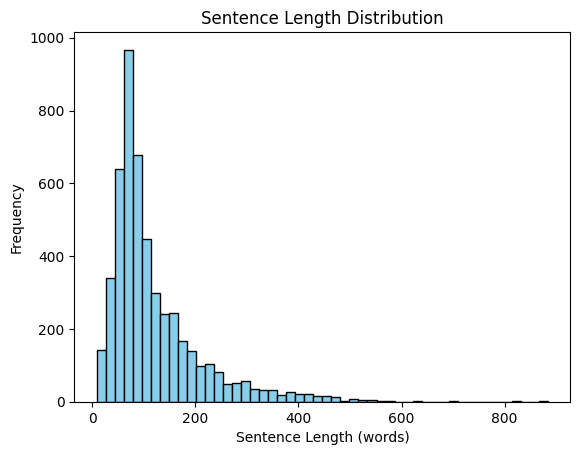

In [12]:
import matplotlib.pyplot as plt

plt.hist(sentence_lengths, bins=50, color='skyblue', edgecolor='k')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Frequency')
plt.show()




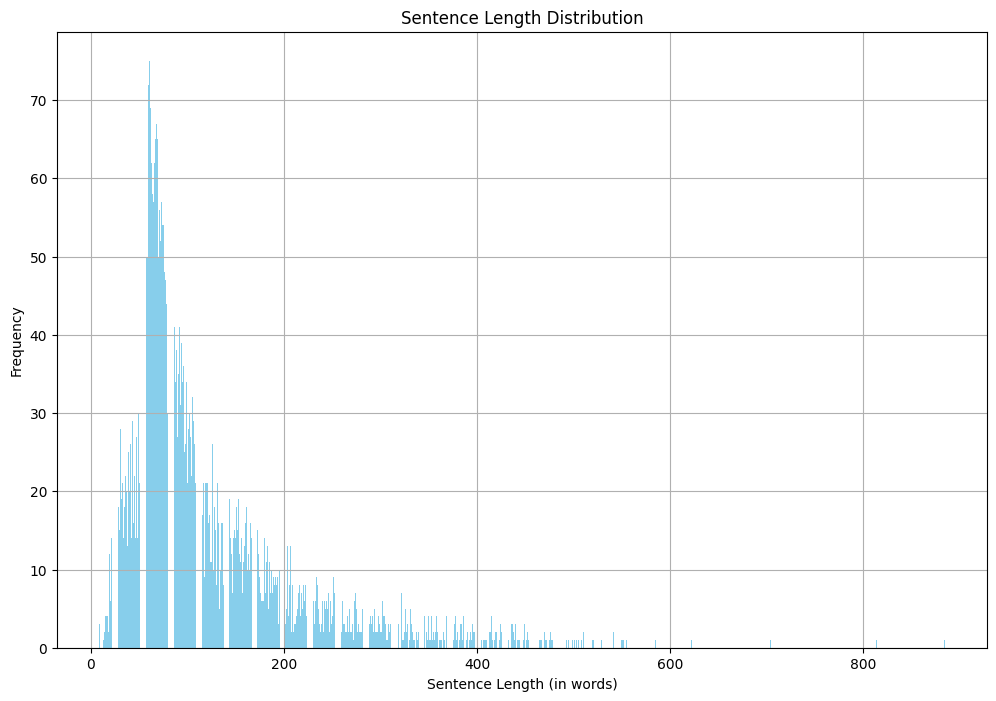

In [13]:
import matplotlib.pyplot as plt
import nltk

# Calculate the sentence length distribution
sentence_length = [len(sent.split()) for sent in X_cleaned]
length_distribution = nltk.FreqDist(sentence_length)

# Plotting the distribution
plt.figure(figsize=(12, 8))
plt.bar(length_distribution.keys(), length_distribution.values(), color='skyblue')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution')
plt.grid(True)
plt.show()

## Vectorize the Data

In [14]:
# Vectorization is the process of converting tokens into numberic data

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)
# Don't need the original b/c we separated stop_words into its own function during Data Cleaning
# tfidf_vect = TfidfVectorizer(max_features=2000, min_df=5,  max_df=0.7, \
#              stop_words=stopwords.words('english') )

X_vectorized = tfidf_vect.fit_transform(X_cleaned).toarray()
X_vectorized[:5]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.0908028, 0.       , ..., 0.       , 0.3252173,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

## Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=0)
print(X_train.shape)

(4000, 2000)


## Buid the ANN Model

In [16]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(10,), max_iter=50, verbose=0, random_state=1) # learning_rate_init if not specified is 0.001

In [17]:
clf.fit (X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=50, random_state=1, verbose=0)

ConvergenceWarning means that the model has not converged yet and needs more iterations and thus a more powerful computer

In [18]:
y_pred=clf.predict(X_test)
print(y_pred[:5])

['negative' 'negative' 'positive' 'negative' 'negative']


In [19]:
print (clf.score(X_train,y_train))
print (clf.score(X_test,y_test))

0.97225
0.839


In [20]:
# the train/test scores show the model is overfitting

# To avoid overfitting, Grid Search was used to find the best hyperparameters.
# However, Grid Search did not improve the model as shown further below in the commented out code.
# My computer could only handle a limited number of iterations and hidden layers, which is why there are so many warnings when running the code.

## Enhance the Model

In [21]:
# from sklearn.model_selection import GridSearchCV

# # Create the parameter grid based on the results of random search
# param_grid = {
#     'hidden_layer_sizes': [(10,), (50,), (100,)],
#     'max_iter': [50, 100, 200],
#     'learning_rate_init': [0.001, 0.01, 0.05, 0.1]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)

# # Fit the grid search model
# grid_search.fit(X_train, y_train)

# # Retrieve the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Train the classifier with the best parameters
# clf = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
#                     max_iter=best_params['max_iter'],
#                     learning_rate_init=best_params['learning_rate_init'],
#                     verbose=0, random_state=1)
# clf.fit(X_train, y_train)

# # Print the scores
# print("Training score:", clf.score(X_train, y_train))
# print("Testing score:", clf.score(X_test, y_test))

# # Create the parameter grid based on the results of random search
# param_grid = {
#     'hidden_layer_sizes': [(10,), (50,), (100,)],
#     'max_iter': [100, 200, 300],
#     'learning_rate_init': [0.001, 0.01, 0.05, 0.1]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)

# # Fit the grid search model
# grid_search.fit(X_train, y_train)

# # Retrieve the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Train the classifier with the best parameters
# clf = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
#                     max_iter=best_params['max_iter'],
#                     learning_rate_init=best_params['learning_rate_init'],
#                     verbose=0, random_state=1)
# clf.fit(X_train, y_train)

# # Print the scores
# print("Training score:", clf.score(X_train, y_train))
# print("Testing score:", clf.score(X_test, y_test))

## Model Evaluation - Accuracy Score and Classification Report

In [22]:
from sklearn.metrics import accuracy_score, classification_report
print(f'MLP Classifier Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(f'\nClassification Report:\n {classification_report(y_test, y_pred)}')


MLP Classifier Accuracy: 83.90%

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85       525
    positive       0.83      0.83      0.83       475

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



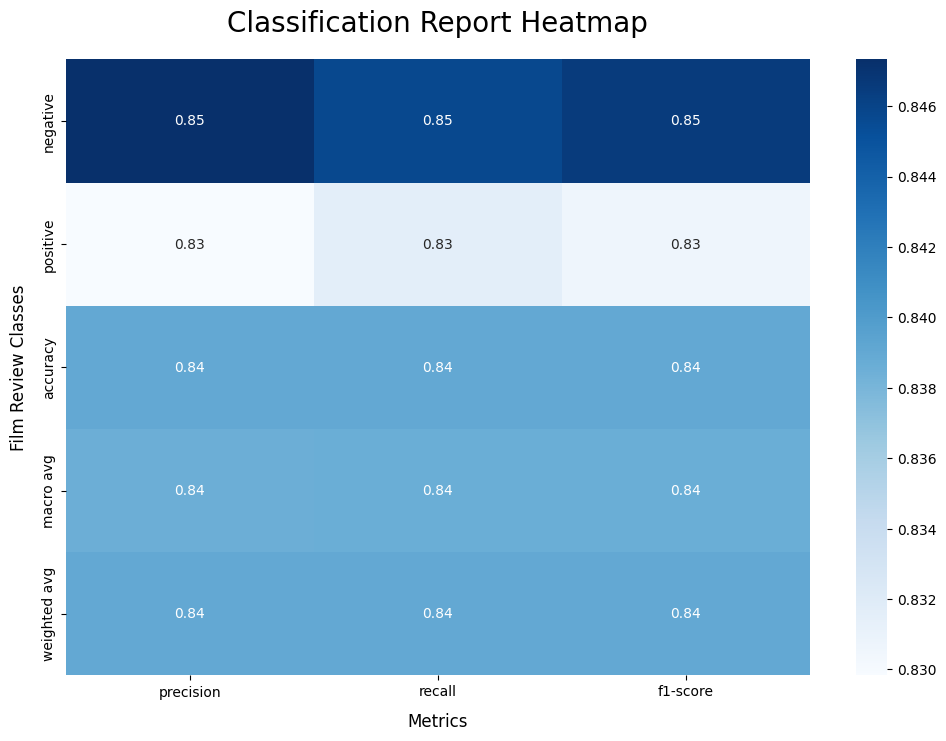

In [31]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report dictionary into a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Remove the support column from the DataFrame
report_df.drop('support', axis=1, inplace=True, errors='ignore')
# report_df = report_df.drop(columns=['support']) # Alternative method

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(report_df, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap', fontsize=20, pad=20)
plt.xlabel('Metrics', fontsize=12, labelpad=10)
plt.ylabel('Film Review Classes', fontsize=12, labelpad=10)
plt.show()

## Model Evaluation - Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
print(f'MLPClassifier Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

MLPClassifier Confusion Matrix:
[[444  81]
 [ 80 395]]


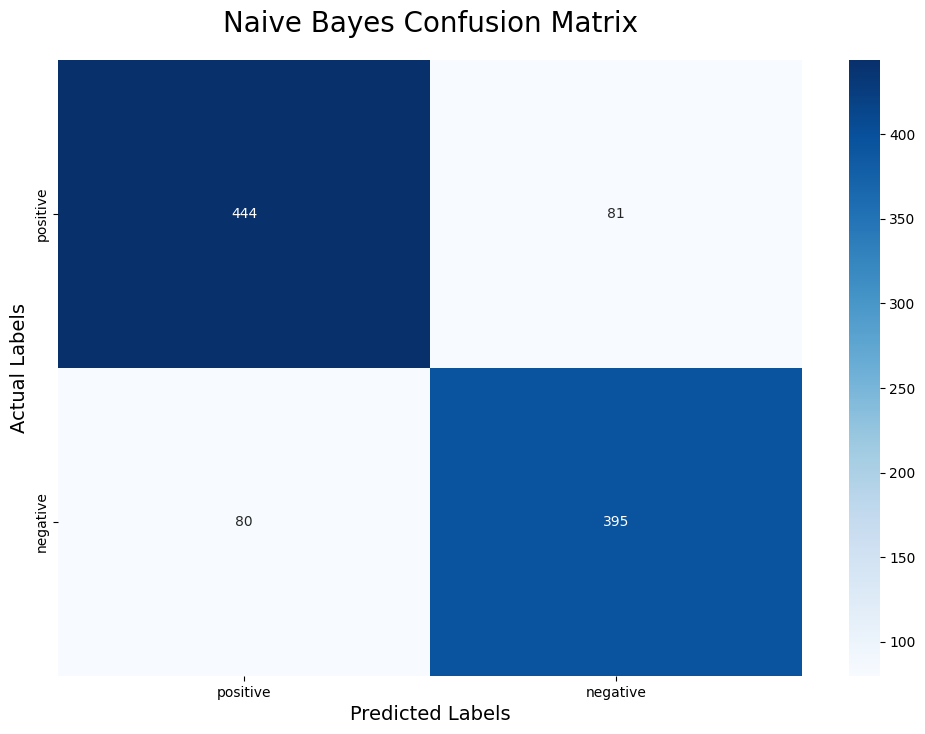

In [97]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
mlpc_cmatrix = confusion_matrix(y_test, y_pred)

category_names = df['sentiment'].unique()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(12, 8))
# sns.heatmap(mlpc_cmatrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
sns.heatmap(mlpc_cmatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=category_names, yticklabels=category_names
            )
plt.title('Naive Bayes Confusion Matrix', fontsize=20, pad=20)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.show()

## Deploy Model to Make Predictions

In [23]:
print('These are correct predictions:')
print(clf.predict(tfidf_vect.transform([cleanup("It is a good movie")])))
print(clf.predict(tfidf_vect.transform([cleanup("It was a bad film")])))
print(clf.predict(tfidf_vect.transform([cleanup("It was ok.")])))
print(clf.predict(tfidf_vect.transform([cleanup("It was good, but I would not watch it again.")])))
print(clf.predict(tfidf_vect.transform([cleanup("It was good, but I will never watch it again.")])))
print(clf.predict(tfidf_vect.transform([cleanup("Trash movie.")])))

print("\nThese are false positive predictions:")
print(clf.predict(tfidf_vect.transform([cleanup("I will never watch it again.")])))
print(clf.predict(tfidf_vect.transform([cleanup("Best trash movie in past 10 years.")])))


These are correct predictions:
['positive']
['negative']
['negative']
['positive']
['positive']
['negative']

These are false positive predictions:
['positive']
['positive']


## Conclusion

In Summary, the model is overfitting and the grid search did not improve the model.

Text analysis was added to the code to analyze the text data. The text analysis showed that the average sentence length is 26 words and the average word length is 4.5 characters. The sentence length distribution showed that the maximum sentence length is 56 words and the minimum sentence length is 1 word. The sentence length distribution plot showed that most sentences have a length of 10 to 20 words.

With Text analysis, we can adjust the hyperparameters to improve the model. We can also use other techniques such as increasing the number of training samples, reducing the number of features, increasing the number of samples, using regularization, using dropout, using cross-validation, using early stopping, and using a simpler model to improve the model.

The predictions are mostly correct, but there are some false positive predictions. The false positive predictions are due to the model's inability to understand the context of the text. For example, 'I will never watch it again' is a negative review, but the model predicts it as a positive review. Similarly, 'Best trash movie in past 10 years' is a negative review, but the model predicts it as a positive review.

To improve the model, we can explore other techniques such as deep learning models like LSTM or BERT, which can better understand the context of the text. LSTM is a type of recurrent neural network that can capture long-term dependencies in the text data. BERT is a transformer-based model that can capture bidirectional context in the text data. These models can improve the model's performance by better understanding the context of the text data.